In [4]:
# import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import uuid # to generate unique image names

# import tensorflow dependencies - Functional API. passing through 2 images at same time and measure the similarity. if similar = 1, if diff = 0
from tensorflow.keras.models import Model #
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [7]:
# setup paths
POS_PATH = os.path.join('data', 'positive') #joins dif directories together to be able to form a full file path. positive verification images
NEG_PATH = os.path.join('data', 'negative') #negative verification image
ANC_PATH = os.path.join('data', 'anchor')
#make the directories
#os.makedirs(POS_PATH)
#os.makedirs(NEG_PATH)
#os.makedirs(ANC_PATH)

In [7]:
# http://vis-www.cs.umass.edu/lfw/

# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

In [8]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [2]:
# Import uuid library to generate unique image names
import uuid

In [15]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\ef4f067d-e33a-11ec-b8f2-f0d5bfaceaa8.jpg'

In [ ]:
# establish connection to webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

     #cut down from to 250x250px
    frame = frame[120:120 +250,200:200 +250, :]
    # specifying range of values we want from our pic - we want 250x250 to be the same as lfw
    # plt.imshow(frame[120:120 +250,200:200 +250, :])
    # plt.show()


    # collect anchors - if hit a will take anchor image
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # create unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # write out anchor image
        cv2.imwrite(imgname, frame)

    # collect positives - if hit p will collect positive image
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # create unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # write out positive image
        cv2.imwrite(imgname, frame)

    
    # show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # breaking gracefully - when hit q will close down frame
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# release webcam
cap.release()
# close image show frame
cv2.destroyAllWindows()


In [8]:
# grabbing everything inside paths with.jpg on the end - only want 300 images for each
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [12]:
ANC_PATH+'\*.jpg'

'data\\anchor\\*.jpg'

In [9]:
dir_test = anchor.as_numpy_iterator()

In [14]:
print(dir_test.next())

b'data\\anchor\\60c257fd-e338-11ec-a7d0-f0d5bfaceaa8.jpg'


In [10]:
# loads image from file path, decode jpg, resize image, scales it
def preprocess(file_path):
    
    # read in image from file path
    byte_img = tf.io.read_file(file_path)
    # load in the image
    img = tf.io.decode_jpeg(byte_img)
    
    # preprocessing steps - resizing the image to be 100x100px
    img = tf.image.resize(img, (100,100))
    # scale image to be between 0 and 1 - takes every pixel value which is usually from 0-255 and divides it to be between 0 and 1. 
    img = img / 255.0
    
    # Return image
    return img

In [18]:
img = preprocess('data\\anchor\\60c257fd-e338-11ec-a7d0-f0d5bfaceaa8.jpg')

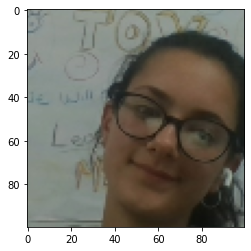

In [19]:
plt.imshow(img)

In [ ]:
dataset.map(preprocess)

In [11]:
#(anchor, positive) => 1,1,1,1,1
#(anchor, negative) => 0,0,0,0,0

# Zip allows us to iterate through all 3 at same time.  tf.ones(len) etc is creating a big set af array which represents one - creating labeled positive so there will be 300 of them.
# if pass through anchor and positive at same time, it represents 1 - positive recognition
# wrapping it inside of this tensorflow data class.
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))

# created seperate dataset for neatives
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))

# joining positive and negative samples so have in one big dataset
data = positives.concatenate(negatives)

In [13]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [14]:
samples = data.as_numpy_iterator()

In [21]:
example = samples.next() #1.0 at end shows it's positive. top line = file path to anchor image, 2nd = file path to possitive image

In [22]:
example

(b'data\\anchor\\54a4c0a0-e338-11ec-999e-f0d5bfaceaa8.jpg',
 b'data\\positive\\f12f96e0-e338-11ec-b43d-f0d5bfaceaa8.jpg',
 1.0)

In [20]:
# going to pass through input image, validation image (pos/neg), and our label - effectively what we did in step above
def preprocess_twin(input_img, validation_img, label):
    # going to load and preprocess input image,validation image and return labe
    return(preprocess(input_img), preprocess(validation_img), label)

In [23]:
# star is unpacking the values
preprocess_twin(*example) 

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.5492647 , 0.59632355, 0.59632355],
         [0.41421568, 0.45931372, 0.46029413],
         [0.527451  , 0.56666666, 0.57058823],
         ...,
         [0.5686275 , 0.6245098 , 0.60588235],
         [0.5767157 , 0.6237745 , 0.60808825],
         [0.5718137 , 0.6188725 , 0.60318625]],
 
        [[0.54901963, 0.59607846, 0.59607846],
         [0.41446078, 0.4615196 , 0.4615196 ],
         [0.4       , 0.44705883, 0.44705883],
         ...,
         [0.56691176, 0.6227941 , 0.6041667 ],
         [0.57279414, 0.61985296, 0.6041667 ],
         [0.5715686 , 0.61960787, 0.6009804 ]],
 
        [[0.46495098, 0.50490195, 0.5022059 ],
         [0.5480392 , 0.5892157 , 0.5862745 ],
         [0.55441177, 0.5955882 , 0.59705883],
         ...,
         [0.56985295, 0.6257353 , 0.6071078 ],
         [0.5647059 , 0.6117647 , 0.59607846],
         [0.5617647 , 0.6068627 , 0.58235294]],
 
        ...,
 
        [[0.49730393, 0.5482843 

In [24]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
# Caches images
data = data.cache()
# shuffled the images, so not getting all positives, then all negatives
data = data.shuffle(buffer_size=1024)

In [26]:
samples = data.as_numpy_iterator()

In [42]:
samp = samples.next()

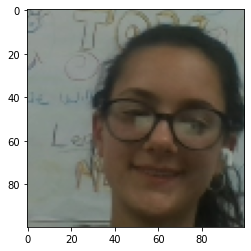

In [43]:
plt.imshow(samp[0])

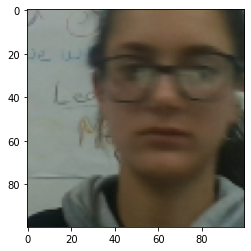

In [44]:
plt.imshow(samp[1])

In [45]:
samp[2]

1.0

In [46]:
round(len(data)*.7)

420

In [48]:
# Training partition
# grabbing 70% - which is 420 images for training partition
train_data = data.take(round(len(data)*.7))
# passing through data as batches of16 images
train_data = train_data.batch(16)
#starts preprocessing the next batch of images
train_data = train_data.prefetch(8)

In [49]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
# Testing partition
# skipped first 420 images
test_data = data.skip(round(len(data)*.7))
# passing through last 30% - 180 images
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)